<a href="https://colab.research.google.com/github/ProfesorCamacho/Egresos_Hospitalarios/blob/main/An%C3%A1lisis_de_defunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

url = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/defunciones/registro/DEFUN_2022.zip?v=2023.11.10'

respuesta = requests.get(url)

archivo_zip = BytesIO(respuesta.content)

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        archivos_en_zip = zip_ref.namelist()
        archivo_interes= archivos_en_zip[0]
        datos = pd.read_csv(zip_ref.open(archivo_interes), engine = "python")


In [40]:
datos.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax
0,1,1,15,1,1,1,15,1,1,1,...,15,12,2021,NaN,88,888,8888,0,01001000241,999
1,1,1,15,1,1,1,15,1,1,1,...,99,1,2022,NaN,88,888,8888,0,01001000242,999
2,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,88,888,8888,0,01001001025,999
3,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,88,888,8888,0,01001001026,999
4,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,1,1,1,0,01001001027,999


In [41]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847716 entries, 0 to 847715
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ent_regis   847716 non-null  int64  
 1   mun_regis   847716 non-null  int64  
 2   tloc_regis  847716 non-null  int64  
 3   loc_regis   847716 non-null  int64  
 4   ent_resid   847716 non-null  int64  
 5   mun_resid   847716 non-null  int64  
 6   tloc_resid  847716 non-null  int64  
 7   loc_resid   847716 non-null  int64  
 8   ent_ocurr   847716 non-null  int64  
 9   mun_ocurr   847716 non-null  int64  
 10  tloc_ocurr  847716 non-null  int64  
 11  loc_ocurr   847716 non-null  int64  
 12  causa_def   847716 non-null  object 
 13  cod_adicio  84917 non-null   object 
 14  lista_mex   847716 non-null  object 
 15  sexo        847716 non-null  int64  
 16  ent_nac     847716 non-null  int64  
 17  afromex     847716 non-null  int64  
 18  conindig    847716 non-null  int64  
 19  le

In [43]:
# Filtramos para defunciones ocurridas en Sonora (entidad 26)
datos_son = datos[datos["ent_ocurr"] == 26]
datos_son.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax
133075,8,20,1,7777,8,20,3,1,26,18,...,2,7,2022,NaN,88,888,8888,0,08020028527,999
677532,25,7,1,161,26,3,1,7777,26,3,...,28,1,2022,NaN,88,888,8888,0,25007000818,999
678273,25,1,4,156,26,33,1,7777,26,33,...,24,1,2022,NaN,88,888,8888,0,25001000795,999
686310,25,1,4,156,26,33,1,33,26,33,...,9,12,2022,NaN,88,888,8888,0,25001016055,999
690145,26,18,14,1,99,999,99,9999,26,18,...,22,6,2021,NaN,99,999,9999,0,26018022356,999


In [57]:
# Seleccionamos algunas columnas de interes y las modificamos para que se entindan mejor
datos_interes = datos_son[["ent_ocurr","mun_ocurr","tloc_ocurr","causa_def" ,"sexo","edad", "mes_ocurr", "ocupacion","ocurr_trab", "natviole" ]]
datos_interes['sexo'] = datos_interes['sexo'].replace({1: 'H', 2: 'M', 9: 'NE'})
datos_interes['ent_ocurr'] = datos_interes['ent_ocurr'].replace({26: "Sonora"})
datos_interes['ocurr_trab'] = datos_interes['ocurr_trab'].replace({1: 'Si', 2: 'No',8:"NA" , 9: 'NE'})
datos_interes['natviole'] = datos_interes['ocurr_trab'].replace({1: 'Si', 2: 'No',8:"NA"})

datos_interes

<ipython-input-57-811b494a5180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_interes['sexo'] = datos_interes['sexo'].replace({1: 'H', 2: 'M', 9: 'NE'})
<ipython-input-57-811b494a5180>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_interes['ent_ocurr'] = datos_interes['ent_ocurr'].replace({26: "Sonora"})
<ipython-input-57-811b494a5180>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,ent_ocurr,mun_ocurr,tloc_ocurr,causa_def,sexo,edad,mes_ocurr,ocupacion,ocurr_trab,natviole
133075,Sonora,18,14,I639,H,4070,7,61,NA,NA
677532,Sonora,3,1,K559,H,4071,1,61,NA,NA
678273,Sonora,33,1,I219,M,4072,1,110,NA,NA
686310,Sonora,33,1,I509,M,4093,12,110,NA,NA
690145,Sonora,18,14,X990,H,4998,6,999,NE,NE
...,...,...,...,...,...,...,...,...,...,...
712537,Sonora,48,11,B222,H,4051,4,998,NA,NA
712538,Sonora,18,14,U071,H,4085,2,110,NA,NA
712539,Sonora,18,14,J189,M,3004,6,997,NA,NA
733093,Sonora,32,1,I10X,M,4040,12,110,NA,NA


In [62]:
datos_interes.describe(include=object)

,ent_ocurr,causa_def,sexo,ocurr_trab,natviole
count,22375,22375,22375,22375,22375
unique,1,1248,3,4,4
top,Sonora,I219,H,NA,NA
freq,22375,4022,13489,19049,19049


In [95]:
conteo_causa = datos_interes['causa_def'].value_counts()
defunciones_totales = datos_interes['causa_def'].value_counts().sum()
porcentaje_defunciones = conteo_causa / defunciones_totales
defunciones_comunes = porcentaje_defunciones.head()

nombres_causas= ['Infarto agudo al miocardio sin otra especificación', 'COVID-19, virus identificado', 'Neumonía no especificada', 'Agresión con disparo de otras armas de fuego, y las no especificadas en calles y carreteras', 'Diabetes mellitus no insulinodependiente, con otras complicaciones especificadas']

defunciones_comunes.index = nombres_causas
defunciones_comunes


Infarto agudo al miocardio sin otra especificación                                             0.179754
COVID-19, virus identificado                                                                   0.050458
Neumonía no especificada                                                                       0.041966
Agresión con disparo de otras armas de fuego, y las no especificadas en calles y carreteras    0.032000
Diabetes mellitus no insulinodependiente, con otras complicaciones especificadas               0.022615
Name: count, dtype: float64

De acuerdo a la clasificación de defunciones de Secretaria de Salud, la causa de defunción mas común en los Sonorenses es infarto agudo del miocardio sin otra especificación. Representando el 18% del total de las defunciones del estado en 2022. El segundo y terecer lugar son enfermedades respiratorias, COVID con 5% y neumonia con 4.2%, respectivamente. Es de sorprender que la cuarta causa de muerte más comun es agresión con disparo de otras armas de fuego con 3.2% de los fallecimientos. Por último, en quinto lugar una enfermedad bastante común en México, Diabetes mellitus que en Sonora el 2.26% de las defunciones fueron por esta razón.

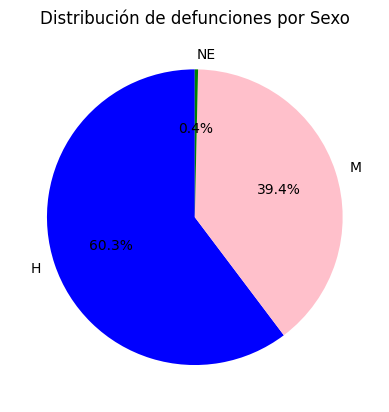

In [66]:
import matplotlib.pyplot as plt

# Contamos los valores para hacer una grafica
conteo_sexo = datos_interes['sexo'].value_counts()

conteo_sexo.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'pink', 'green'])
plt.title('Distribución de defunciones por Sexo')
plt.ylabel('')
plt.show()

A pesar de que en terminos de población no existe gran diferencia entre hombres y mujeres, el 60% de los desesos del 2022 fueron hombres contra un 40% de mujeres.

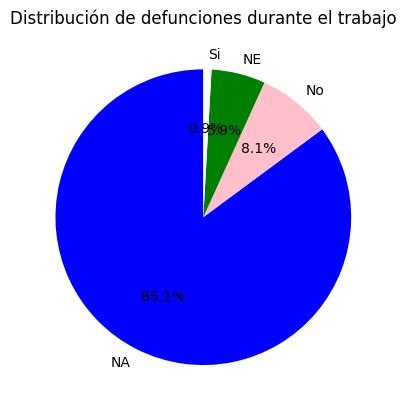

In [70]:
conteo_trabajo = datos_interes['ocurr_trab'].value_counts()

conteo_trabajo.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'pink', 'green',"white"])
plt.title('Distribución de defunciones durante el trabajo')
plt.ylabel('')
plt.show()

Apenas el 1% de las defunciones fueron durante el trabajo, lo que podria significar condicines laborales lo suficiente riesgosas para llevar a la muerte. Del 8% sabemos que no ocurrieron durante las labores, pero de un 85% de las cuales no aplica intuyo se relaciona por cuestiones de edad.

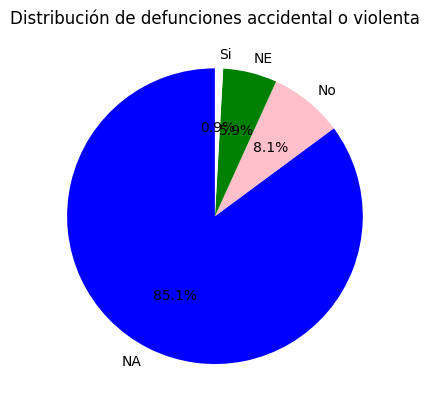

In [96]:
conteo_natviole = datos_interes['natviole'].value_counts()

conteo_natviole.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'pink', 'green',"white"])
plt.title('Distribución de defunciones accidental o violenta')
plt.ylabel('')
plt.show()